In [64]:
import os
import json
from collections import defaultdict

import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, recall_score, precision_score

In [76]:
KNN_RESULTS_DIR = '/cs/phd/nadavb/cafa_project/data/knn/'

knn_results = []
uniref_id_to_uniprot_id = {}

for results_file_name in sorted(os.listdir(KNN_RESULTS_DIR)):
    with open(os.path.join(KNN_RESULTS_DIR, results_file_name), 'r') as f:

        uniref_ids = []
        annotations = []
        
        for line in f:
                
            uniref_id, uniprot_id, raw_k, raw_annotations = line.split(' ')
            record_annotations = {}

            if raw_annotations:
                for raw_annotation in raw_annotations.strip().split(','):
                    raw_annotation_index, raw_score = raw_annotation.split(':')
                    record_annotations[int(raw_annotation_index)] = float(raw_score)

            uniref_ids.append(uniref_id)
            annotations.append(record_annotations)
            
            if uniref_id in uniref_id_to_uniprot_id:
                assert uniref_id_to_uniprot_id[uniref_id] == uniprot_id
            else:
                uniref_id_to_uniprot_id[uniref_id] = uniprot_id
            
        annotations_series = pd.Series(annotations, index = uniref_ids)
        knn_results.append(annotations_series.rename(results_file_name))
    
knn_results = pd.concat(knn_results, axis = 1, sort = True)
knn_results_uniprot_ids = pd.Series([uniref_id_to_uniprot_id[uniref_id] for uniref_id in knn_results.index], \
        index = knn_results.index)
display(knn_results)

,10000_uniq_GOs.txt,1000_uniq_GOs.txt,100_uniq_GOs.txt,10_uniq_GOs.txt
UniRef90_A0A022NZV4,"{4526: 0.6673346693386774, 5479: 0.73146292585...","{4526: 0.6673346693386774, 5479: 0.73146292585...","{4526: 0.61, 5479: 0.7, 7391: 0.54, 10019: 0.6...","{4526: 0.7, 5479: 0.7, 7391: 0.6, 10019: 0.7, ..."
UniRef90_A0A022P8I7,"{22824: 0.6953907815631263, 14960: 0.024048096...","{22824: 0.6953907815631263, 14960: 0.024048096...","{22824: 0.69, 14960: 0.01}","{22824: 0.7, 14960: 0.1}"
UniRef90_A0A022PMU9,"{10019: 0.6975806451612904, 4126: 0.0645161290...","{10019: 0.6975806451612904, 4126: 0.0645161290...","{10019: 0.7, 4126: 0.05, 7879: 0.03}",{10019: 0.5}
UniRef90_A0A022PNH4,"{3431: 0.6292585170340681, 4481: 0.00200400801...","{3431: 0.6292585170340681, 4481: 0.00200400801...","{3431: 0.65, 4481: 0.01}",{3431: 0.6}
UniRef90_A0A022PNR5,"{2707: 0.008016032064128256, 4205: 0.763527054...","{2707: 0.008016032064128256, 4205: 0.763527054...","{2707: 0.03, 4205: 0.57, 4304: 0.09, 4899: 0.0...","{2707: 0.1, 4205: 0.5}"
...,...,...,...,...
UniRef90_X5F5P8,"{6752: 0.7334669338677354, 7234: 0.70340681362...","{6752: 0.7334669338677354, 7234: 0.70340681362...","{6752: 0.73, 7234: 0.69, 6176: 0.04}","{6752: 0.9, 7234: 0.9}"
UniRef90_X5F7I9,"{13467: 0.6753507014028056, 38813: 0.100200400...","{13467: 0.6753507014028056, 38813: 0.100200400...","{13467: 0.78, 38813: 0.08, 10018: 0.5, 10019: ...","{13467: 0.9, 38813: 0.2, 10018: 0.6, 10019: 0.1}"
UniRef90_X5M5N0,"{3563: 0.43887775551102204, 4205: 0.4448897795...","{3563: 0.43887775551102204, 4205: 0.4448897795...","{3563: 0.71, 4205: 0.72, 10019: 0.03, 100: 0.0...","{3563: 0.8, 4205: 0.8}"
UniRef90_X7Y5E2,"{4205: 0.7054108216432866, 4206: 0.55110220440...","{4205: 0.7054108216432866, 4206: 0.55110220440...","{4205: 0.7, 4206: 0.55, 10748: 0.7, 21205: 0.7...","{4205: 0.9, 4206: 1.0, 10748: 0.9, 21205: 0.9,..."


In [77]:
pd.isnull(knn_results).sum(axis = 1).value_counts()

0    66799
1     2881
2      177
dtype: int64

In [63]:
ANNOTATIONS_SQLITE_FILE_PATH = '/cs/phd/nadavb/cafa_project/data/protein_annotations.db'

sql_uniprot_names = '(' + ','.join('\'%s\'' % name for name in set(uniref_id_to_uniprot_id.values())) + ')'

cnx = sqlite3.connect(ANNOTATIONS_SQLITE_FILE_PATH)
go_annots = pd.read_sql_query('SELECT * FROM protein_annotations WHERE uniprot_name IN %s' % sql_uniprot_names, cnx)
display(go_annots)

,index,tax_id,uniprot_name,go_annotations,flat_go_annotations,n_go_annotations,complete_go_annotation_indices,n_complete_go_annotations
0,803,7227.0,M9PB30_DROME,"{""GO Molecular Function"": [""GO:0005201""], ""GO ...","[""GO:0005201"", ""GO:0007424"", ""GO:0007475"", ""GO...",7,"[4013, 5907, 5951, 6430, 10019, 20248, 22774]",7
1,822,7955.0,Q7ZZ46_DANRE,"{""GO Molecular Function"": [""GO:0005524"", ""GO:0...","[""GO:0004672"", ""GO:0005524"", ""GO:0005865"", ""GO...",21,"[3561, 4205, 4509, 5480, 5992, 6381, 9091, 135...",21
2,1940,54126.0,A0A2A6BXY7_PRIPA,"{""GO Molecular Function"": [], ""GO Biological P...",[],0,[],0
3,2749,7165.0,Q7QG88_ANOGA,"{""GO Molecular Function"": [""GO:0051015""], ""GO ...","[""GO:0005623"", ""GO:0005640"", ""GO:0005737"", ""GO...",9,"[4294, 4309, 4396, 5615, 10019, 18309, 27627, ...",9
4,3213,3055.0,A0A2K3E1Z3_CHLRE,"{""GO Molecular Function"": [""GO:0005524"", ""GO:0...","[""GO:0005524"", ""GO:0016887""]",2,"[4205, 10748]",2
...,...,...,...,...,...,...,...,...
66713,106489615,3492.0,LECB1_ARTTO,"{""GO Molecular Function"": [""GO:0030246"", ""GO:0...","[""GO:0019862"", ""GO:0030246""]",2,"[12716, 13787]",2
66714,106489621,6550.0,MEFP_MYTED,"{""GO Molecular Function"": [""GO:0005509""], ""GO ...","[""GO:0005509""]",1,[4193],1
66715,106489623,1271.0,MPHES_MICSP,"{""GO Molecular Function"": [""GO:0016787""], ""GO ...","[""GO:0016787"", ""GO:0042178""]",2,"[10654, 20441]",2
66716,106500131,2517092.0,HYB2_HYPLU,"{""GO Molecular Function"": [], ""GO Biological P...","[""GO:0005576"", ""GO:0006952"", ""GO:0044179""]",3,"[4250, 5491, 22269]",3


In [78]:
uniprot_id_to_uniref_ids = defaultdict(set)

for uniref_id, uniprot_id in uniref_id_to_uniprot_id.items():
    uniprot_id_to_uniref_ids[uniprot_id].add(uniref_id)
    
uniprot_id_to_uniref_annotations = go_annots.set_index('uniprot_name')['complete_go_annotation_indices'].apply(\
        lambda raw_annotations: set(json.loads(raw_annotations)))
true_annotations = {(uniref_id, annotation) for uniprot_id, annotations in uniprot_id_to_uniref_annotations.iteritems() \
        for annotation in annotations for uniref_id in uniprot_id_to_uniref_ids[uniprot_id]}
print(len(true_annotations))

209026


In [79]:
for knn_file_name, knn_file_results in knn_results.iteritems():
    
    pred_annotations = {(uniref_id, annotation): score for uniref_id, prot_pred_annotations in \
            knn_file_results.dropna().iteritems() for annotation, score in prot_pred_annotations.items()}
    print('%s: %d, %d' % (knn_file_name, len(pred_annotations), len(true_annotations & set(pred_annotations.keys()))))
    
    relevant_annotations = list(sorted(true_annotations | set(pred_annotations.keys())))
    y_true = np.array([float(annot_key in true_annotations) for annot_key in relevant_annotations])
    y_pred = np.array([pred_annotations.get(annot_key, 0.0) for annot_key in relevant_annotations])
    print('AUC = %.3f' % roc_auc_score(y_true, y_pred))
    
    for T in [0, 0.09, 0.49]:
        for score_name, score_method in [('recall', recall_score), ('precision', precision_score)]:
            print('With threshold > %s, %s = %.3f' % (T, score_name, score_method(y_true, y_pred > T)))

10000_uniq_GOs.txt: 1931545, 201430
AUC = 0.871
With threshold > 0, recall = 0.964
With threshold > 0, precision = 0.104
With threshold > 0.09, recall = 0.528
With threshold > 0.09, precision = 0.511
With threshold > 0.49, recall = 0.345
With threshold > 0.49, precision = 0.672
1000_uniq_GOs.txt: 1931545, 201430
AUC = 0.871
With threshold > 0, recall = 0.964
With threshold > 0, precision = 0.104
With threshold > 0.09, recall = 0.528
With threshold > 0.09, precision = 0.511
With threshold > 0.49, recall = 0.345
With threshold > 0.49, precision = 0.672
100_uniq_GOs.txt: 800882, 194188
AUC = 0.756
With threshold > 0, recall = 0.929
With threshold > 0, precision = 0.242
With threshold > 0.09, recall = 0.582
With threshold > 0.09, precision = 0.532
With threshold > 0.49, recall = 0.342
With threshold > 0.49, precision = 0.697
10_uniq_GOs.txt: 349102, 155569
AUC = 0.533
With threshold > 0, recall = 0.744
With threshold > 0, precision = 0.446
With threshold > 0.09, recall = 0.744
With thresho

# XXX Old

In [46]:
THRESHOLD = 0

id_to_uniref_annotations = go_annots.set_index('uniprot_name')['complete_go_annotation_indices'].apply(json.loads)

auc_scores = pd.DataFrame(index = clean_knn_results.index, columns = clean_knn_results.columns)
recall_scores = pd.DataFrame(index = clean_knn_results.index, columns = clean_knn_results.columns)
precision_scores = pd.DataFrame(index = clean_knn_results.index, columns = clean_knn_results.columns)

for prot_id in clean_knn_results.index:

    if prot_id in id_to_uniref_annotations:
        true_annotations = set(id_to_uniref_annotations[prot_id])
    else:
        continue
        
    if not true_annotations:
        continue

    for knn_file_name in clean_knn_results.columns:
        
        knn_preds = clean_knn_results.loc[prot_id, knn_file_name]
        relevant_annotations = list(sorted(true_annotations | set(knn_preds.keys())))
        y_true = np.array([float(annotation in true_annotations) for annotation in relevant_annotations])
        y_pred = np.array([knn_preds.get(annotation, 0.0) for annotation in relevant_annotations])
        
        try:
            auc_scores.loc[prot_id, knn_file_name] = roc_auc_score(y_true, y_pred)
        except ValueError:
            pass
        
        recall_scores.loc[prot_id, knn_file_name] = recall_score(y_true, y_pred > THRESHOLD)
        precision_scores.loc[prot_id, knn_file_name] = precision_score(y_true, y_pred > THRESHOLD)
        
print('Done.')

/cs/labs/michall/nadavb/my_python3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/cs/labs/michall/nadavb/my_python3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/cs/labs/michall/nadavb/my_python3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/cs/labs/michall/nadavb/my_python3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


KeyboardInterrupt: 

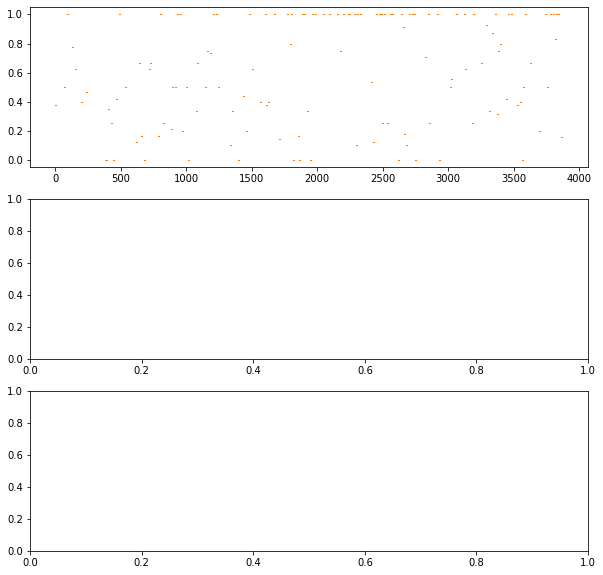

In [47]:
score_names = ['AUC', 'recall', 'precision_scores']
score_dfs = [auc_scores, recall_scores, precision_scores]

fig, axes = plt.subplots(nrows = 3, figsize = (10, 10))

for ax, score_name, score_df in zip(axes, score_names, score_dfs):
    ax.boxplot(score_df.values.transpose())
    ax.set_xlabels(score_df.columns)
    ax.set_title(score_name)